In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = {
    "scores" : [ 55, 60, 65, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 200 ]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Central Tendency
mean_value = df["scores"].mean()
median_value = df["scores"].median()
mode_value = df["scores"].mode()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

Mean: 93.33333333333333
Median: 85.0
Mode: 0    65
Name: scores, dtype: int64


In [ ]:
# Spread
variance_value = df["scores"].var()
std_value = df["scores"].std()

print(f"Standard Deviation: {std_value}")
print(f"Variance: {variance_value}")

Standard Deviation: 36.92011969232004
Variance: 1363.0952380952383


In [ ]:
# Skewness and Kurtosis
skewness_value = skew(df["scores"])
kurtosis_value = kurtosis(df["scores"])

print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Skewness: 1.654419036675856
Kurtosis: 2.641877538567151


In [ ]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

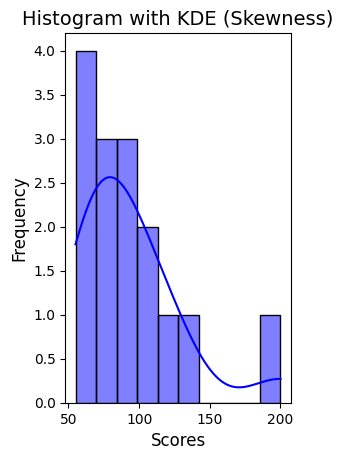

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(df['scores'], kde=True, color='blue', bins=10)
plt.title('Histogram with KDE (Skewness)', fontsize=14)
plt.xlabel('Scores', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0.5, 0, 'Scores')

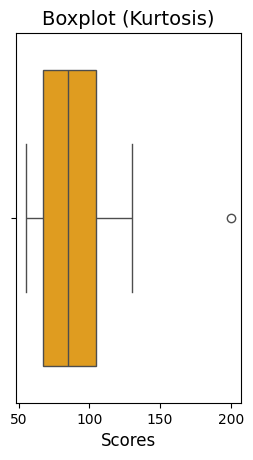

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df['scores'], color='orange')
plt.title('Boxplot (Kurtosis)', fontsize=14)
plt.xlabel('Scores', fontsize=12)

In [ ]:
data = {
    'Category': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D'],
    'Subcategory': ['X', 'Y', 'X', 'Y', 'Y', 'X', 'Y', 'X', 'X', 'Y'],
    'Scores': [55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     10 non-null     object
 1   Subcategory  10 non-null     object
 2   Scores       10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
df.head()

,Category,Subcategory,Scores
0,A,X,55
1,A,Y,60
2,B,X,65
3,B,Y,70
4,B,Y,75


In [ ]:
# Cross Tabulation
cross_tab = pd.crosstab(df['Category'], df['Subcategory'])
print(cross_tab)

Subcategory  X  Y
Category         
A            1  1
B            1  2
C            3  1
D            0  1


In [ ]:
# Statistics for one quantitative variable grouped by one categorical variable

In [ ]:
mean_stats = df.groupby('Category')['Scores'].mean()
median_stats = df.groupby('Category')['Scores'].median()

print(mean_stats)
print(median_stats)

Category
A     57.5
B     70.0
C     87.5
D    100.0
Name: Scores, dtype: float64
Category
A     57.5
B     70.0
C     87.5
D    100.0
Name: Scores, dtype: float64


Text(0, 0.5, 'Sepal Length')

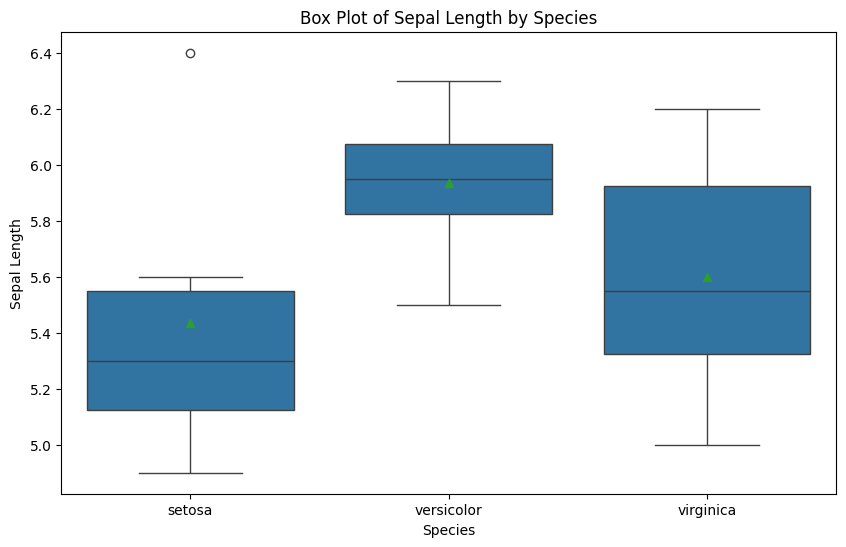

In [ ]:
# Box Plot

data = {
    'sepal_length': [5.1, 4.9, 5.4, 5.6, 5.2, 6.1, 6.3, 5.8, 6.0, 5.5, 5.7, 5.0, 5.3, 5.4, 6.2, 6.4, 5.9, 6.0],
    'species': ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
                'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'setosa', 'versicolor', 'virginica']
}

df.head()

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=df, showmeans = True)
plt.title('Box Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  18 non-null     float64
 1   species       18 non-null     object 
dtypes: float64(1), object(1)
memory usage: 416.0+ bytes


In [ ]:
setosa_df = df[df['species'] == 'versicolor']
results = setosa_df['sepal_length'].agg(['min', 'max', 'median', 'mean'])
print(results)

min       5.500000
max       6.300000
median    5.950000
mean      5.933333
Name: sepal_length, dtype: float64


In [ ]:
for name, group in df.groupby('species'):
    print(name)
    print(group)

    skew = group['sepal_length'].skew()
    # kurtosis = group['sepal_length'].kurtosis()

    print(f'Skewness: {skew}')
    # print(f'Kurtosis: {kurtosis}')

setosa
    sepal_length species
0            5.1  setosa
1            4.9  setosa
2            5.4  setosa
3            5.6  setosa
4            5.2  setosa
15           6.4  setosa
Skewness: 1.4102216330727377
versicolor
    sepal_length     species
5            6.1  versicolor
6            6.3  versicolor
7            5.8  versicolor
8            6.0  versicolor
9            5.5  versicolor
16           5.9  versicolor
Skewness: -0.4345805012348996
virginica
    sepal_length    species
10           5.7  virginica
11           5.0  virginica
12           5.3  virginica
13           5.4  virginica
14           6.2  virginica
17           6.0  virginica
Skewness: 0.09767811237575884
